In [30]:
from Req.greedy import two_opt_swap
from Req.req import Hamiltonian
import numpy as np
from Req import nearest_neighbour, gen_ran


def random_swap(tour):
    n = len(tour)
    a = np.random.randint(n)
    b = np.random.randint(n)
    while b == a:
        b = np.random.randint(n)
    nodes = list(tour.cycle)
    swap_index = (a, b)
    swap_value = (nodes[a], nodes[b])
    for i in range(2):
        nodes[swap_index[i]] = swap_value[1-i]

    return Hamiltonian(tuple(nodes), tour.map)


def random_vertex_insert_mutation(tour):
    n = len(tour)
    a = np.random.randint(n-1)
    b = np.random.randint(a + 1, n)

    return Hamiltonian(tuple(list(tour.cycle[:a]) + [tour.cycle[b]] + list(tour.cycle[a:b]) + list(tour.cycle[b+1:])), tour.map)


def random_block_insert_mutation(tour):
    n = len(tour)
    a = np.random.randint(n - 2)
    b = np.random.randint(a + 1, n - 1)
    c = np.random.randint(b + 1, n)

    return Hamiltonian(tuple(list(tour.cycle[:a]) + list(tour.cycle[b:c+1]) + list(tour.cycle[a:b]) + list(tour.cycle[c+1:])), tour.map)


def random_block_reverse_mutation(tour):
    n = len(tour)
    a = np.random.randint(n - 1)
    b = np.random.randint(a + 1, n)
    return two_opt_swap(a, b, tour)


def hybrid(tour, a=0.89, b=0.1):
    n = np.random.random()

    if n < a:
        return random_block_reverse_mutation(tour)
    elif n < a + b:
        return random_vertex_insert_mutation(tour)
    else:
        return random_block_insert_mutation(tour)


def simulated_annealing(tour, t0=100, alpha=0.99, int_its=20, swap=random_swap):

    best_tour = tour
    t = t0

    tour_length = []
    temps = []
    while t > 10**(-5):
        for n in range(int_its):
            new_tour = swap(best_tour)
            rand = np.random.random()
            delta = new_tour.cost() - best_tour.cost()

            if delta < 0 or rand < np.exp(-(delta/t)):
                best_tour = new_tour
        tour_length.append(best_tour.cost())
        temps.append(t)
        t = alpha * t

    return best_tour, tour_length, temps

In [81]:
map = gen_ran(10)
before = nearest_neighbour(map)
after, cost, temps = simulated_annealing(before, swap=hybrid, alpha=0.995, int_its=100)

In [82]:
(before.cost(), after.cost())

(3.224820588689583, 3.1716040885988788)

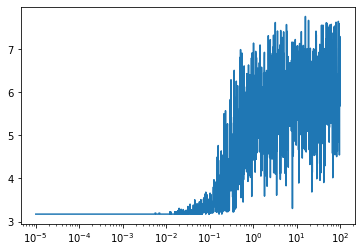

In [83]:
from matplotlib import pyplot as plt

plt.semilogx(temps, cost)
plt.show()

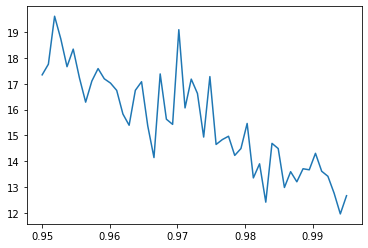

In [61]:
map = gen_ran(100)
tour = nearest_neighbour(map)
alpha = np.linspace(0.95, 0.995)
costs = []
for a in alpha:
    costs.append(simulated_annealing(tour, alpha=a)[0].cost())

plt.plot(alpha, costs)
plt.show()


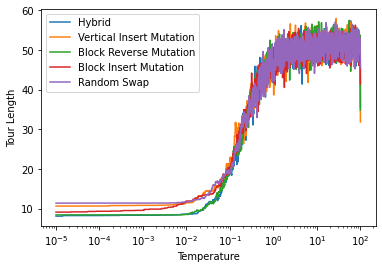

In [63]:
map = gen_ran(100)
tour = nearest_neighbour(map)
hybrid_cost, temps = simulated_annealing(tour, swap=hybrid, alpha=0.995, int_its=50)[1:]
vert_ins_cost, temps = simulated_annealing(tour, swap=random_vertex_insert_mutation, alpha=0.995, int_its=50)[1:]
block_rev_cost, temps = simulated_annealing(tour, swap=random_block_reverse_mutation, alpha=0.995, int_its=50)[1:]
block_ins_cost, temps = simulated_annealing(tour, swap=random_block_insert_mutation, alpha=0.995, int_its=50)[1:]
rand_swap_cost, temps = simulated_annealing(tour, swap=random_swap, alpha=0.995, int_its=50)[1:]

plt.semilogx(temps, hybrid_cost, label='Hybrid')
plt.semilogx(temps, vert_ins_cost, label='Vertical Insert Mutation')
plt.semilogx(temps, block_rev_cost, label='Block Reverse Mutation')
plt.semilogx(temps, block_ins_cost, label='Block Insert Mutation')
plt.semilogx(temps, rand_swap_cost, label='Random Swap')
plt.xlabel('Temperature')
plt.ylabel('Tour Length')
plt.legend()
plt.show()





In [77]:
# lis = [str((a, b)) for a, b in zip(temps, hybrid_cost)]

lis = [str((a, b)) for a, b in zip(temps, vert_ins_cost)]

# s = [str((a, b)) for a, b in zip(temps, block_rev_cost)]

# lis = [str((a, b)) for a, b in zip(temps, block_ins_cost)]

# lis = [str((a, b)) for a, b in zip(temps, rand_swap_cost)]
print(''.join(lis))

(100, 31.85075759177778)(99.5, 47.74535435409325)(99.0025, 50.777547600976085)(98.5074875, 52.59348865381062)(98.01495006249999, 52.05088383012612)(97.52487531218749, 49.60141779309288)(97.03725093562655, 49.636435811207384)(96.55206468094842, 51.86614943469217)(96.06930435754367, 47.03727621109479)(95.58895783575595, 48.675743858477304)(95.11101304657717, 53.33563728108587)(94.63545798134429, 52.515037046593484)(94.16228069143757, 50.438533710327505)(93.69146928798038, 51.29002003405866)(93.22301194154048, 51.48488371980813)(92.75689688183277, 51.36746427565268)(92.29311239742361, 52.16589143515462)(91.8316468354365, 50.3611350708482)(91.37248860125932, 48.26262338765609)(90.91562615825302, 50.179808573221486)(90.46104802746176, 50.35763811531096)(90.00874278732445, 51.71588508331897)(89.55869907338783, 49.62591386126084)(89.11090557802089, 53.3257361296862)(88.66535105013078, 51.36789039495829)(88.22202429488013, 53.72602204521254)(87.78091417340573, 52.577187285175825)(87.3420096025